### Import Bibliotecas e Conexão com API CoinCap 2.0

In [6]:
# Importando API para o Script

import requests
import pandas
import numpy as np
import time
import os
import matplotlib.pyplot as plt
from dotenv import load_dotenv
load_dotenv('.env')

def get_data_from_api(url, params=None):
    headers = {"User-Agent": "Mozilla/5.0"}  # Cabeçalho para compatibilidade
    try:
        response = requests.get(url, params=params, headers=headers)
        response.raise_for_status()  # Lança uma exceção se houver um erro HTTP
        return response.json()  # Retorna os dados em formato JSON
    except requests.exceptions.RequestException as e:
        print(f"Erro ao consumir a API: {e}")
        return None

In [3]:
# Pegando todas as criptomoedas da API
api_url = "https://api.coincap.io/v2/assets"
params = {"sort": "marketCap"}  # Ordena por capitalização de mercado
data = get_data_from_api(api_url, params=params)

if data:
    for asset in data.get("data", []):
        print(f"{asset['rank']}. {asset['name']} ({asset['symbol']}): ${asset['priceUsd']}")


1. Bitcoin (BTC): $105217.5952685913258783
2. Ethereum (ETH): $3255.5009281827732488
3. XRP (XRP): $3.1372630670315949
4. Tether (USDT): $0.9999909891939355
5. Solana (SOL): $240.8387583957510973
6. BNB (BNB): $679.1771109582323391
7. USDC (USDC): $1.0000174652983930
8. Dogecoin (DOGE): $0.3328688622161029
9. Cardano (ADA): $0.9650225773990581
10. Lido Staked ETH (STETH): $3246.1226657218295601
11. TRON (TRX): $0.2519698697973406
12. Chainlink (LINK): $24.5279599947245709
13. Avalanche (AVAX): $34.4836962818766963
14. Wrapped Bitcoin (WBTC): $104882.5268702931237414
15. Stellar (XLM): $0.4311194567756763
16. Shiba Inu (SHIB): $0.0000187679986186
17. Litecoin (LTC): $129.8177292169300502
18. Polkadot (DOT): $6.1644247178249815
19. Bitcoin Cash (BCH): $436.2785910438090173
20. Uniswap (UNI): $12.0357414929890882
21. NEAR Protocol (NEAR): $4.6428411815169959
22. Multi Collateral DAI (DAI): $0.9994629649833296
23. Trump Official (TRUMP): $26.4979858397699505
24. Aave (AAVE): $316.421422969

In [4]:
def get_exchange_rate():
    url = "https://api.exchangerate-api.com/v4/latest/USD"  # API pública para conversão de moedas
    try:
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()
        return data["rates"].get("BRL", 1)  # Retorna a taxa de câmbio para BRL (se falhar, retorna 1)
    except requests.exceptions.RequestException as e:
        print(f"Erro ao obter taxa de câmbio: {e}")
        return 1  # Se houver erro, mantemos o valor original em USD


### Volume e Market Cap

In [5]:
def get_crypto_data():
    url = "https://api.coincap.io/v2/assets"
    params = {"sort": "marketCap"}
    exchange_rate = get_exchange_rate()  # Obtém a taxa de conversão USD -> BRL

    try:
        response = requests.get(url, params=params)
        response.raise_for_status()
        data = response.json().get("data", [])

        print("\n Criptomoedas (Valores Convertidos para BRL)\n")
        for asset in data:
            price_brl = float(asset["priceUsd"]) * exchange_rate
            market_cap_brl = float(asset["marketCapUsd"]) * exchange_rate
            volume_brl = float(asset["volumeUsd24Hr"]) * exchange_rate

            print(f"{asset['rank']}. {asset['name']} ({asset['symbol']}):")
            print(f"   Preço: R$ {price_brl:,.2f}")
            print(f"   Market Cap: R$ {market_cap_brl:,.2f}")
            print(f"   Volume 24h: R$ {volume_brl:,.2f}\n")

    except requests.exceptions.RequestException as e:
        print(f"Erro ao obter dados das criptomoedas: {e}")

# Executar a função
get_crypto_data()



 Criptomoedas (Valores Convertidos para BRL)

1. Bitcoin (BTC):
   Preço: R$ 616,575.11
   Market Cap: R$ 12,218,851,426,896.82
   Volume 24h: R$ 62,234,735,775.36

2. Ethereum (ETH):
   Preço: R$ 19,077.24
   Market Cap: R$ 2,299,118,005,501.98
   Volume 24h: R$ 33,537,552,201.90

3. XRP (XRP):
   Preço: R$ 18.38
   Market Cap: R$ 1,059,696,868,820.29
   Volume 24h: R$ 8,017,747,066.85

4. Tether (USDT):
   Preço: R$ 5.86
   Market Cap: R$ 816,910,382,241.89
   Volume 24h: R$ 123,170,789,335.42

5. Solana (SOL):
   Preço: R$ 1,411.32
   Market Cap: R$ 686,935,573,946.03
   Volume 24h: R$ 9,065,257,478.93

6. BNB (BNB):
   Preço: R$ 3,979.98
   Market Cap: R$ 573,143,996,559.85
   Volume 24h: R$ 1,039,360,438.08

7. USDC (USDC):
   Preço: R$ 5.86
   Market Cap: R$ 311,600,669,293.30
   Volume 24h: R$ 16,779,112,866.11

8. Dogecoin (DOGE):
   Preço: R$ 1.95
   Market Cap: R$ 288,382,537,220.03
   Volume 24h: R$ 3,073,063,546.54

9. Cardano (ADA):
   Preço: R$ 5.66
   Market Cap: R$ 198

### Histórico de Preço por Cripto


In [6]:
def get_crypto_history(crypto_id, interval="d1"):
    url = f"https://api.coincap.io/v2/assets/{crypto_id}/history"
    params = {"interval": interval}
    data = get_data_from_api(url, params)

    if data and "data" in data:
        print(f"Histórico de preços para {crypto_id}:")
        for entry in data["data"]:
            print(f"Data: {entry['time']}, Preço: R$ {float(entry['priceUsd']) * 5.00:.2f}")
    else:
        print("Erro ao obter histórico de preços.")

crypto_history_to_analyze = input('Digite o id da Crypto que pretende analisar: ')
get_crypto_history(crypto_history_to_analyze)

Histórico de preços para solana:
Data: 1706745600000, Preço: R$ 479.31
Data: 1706832000000, Preço: R$ 499.69
Data: 1706918400000, Preço: R$ 493.86
Data: 1707004800000, Preço: R$ 486.36
Data: 1707091200000, Preço: R$ 481.62
Data: 1707177600000, Preço: R$ 478.36
Data: 1707264000000, Preço: R$ 483.52
Data: 1707350400000, Preço: R$ 511.34
Data: 1707436800000, Preço: R$ 526.65
Data: 1707523200000, Preço: R$ 544.08
Data: 1707609600000, Preço: R$ 544.07
Data: 1707696000000, Preço: R$ 536.79
Data: 1707782400000, Preço: R$ 563.97
Data: 1707868800000, Preço: R$ 573.77
Data: 1707955200000, Preço: R$ 576.87
Data: 1708041600000, Preço: R$ 557.02
Data: 1708128000000, Preço: R$ 544.49
Data: 1708214400000, Preço: R$ 555.01
Data: 1708300800000, Preço: R$ 562.25
Data: 1708387200000, Preço: R$ 544.35
Data: 1708473600000, Preço: R$ 522.31
Data: 1708560000000, Preço: R$ 521.88
Data: 1708646400000, Preço: R$ 508.46
Data: 1708732800000, Preço: R$ 511.08
Data: 1708819200000, Preço: R$ 516.08
Data: 17089056000

### Variação de Preço Últimas 24 horas

In [7]:
def get_crypto_changes():
    url = "https://api.coincap.io/v2/assets"
    data = get_data_from_api(url)

    if data and "data" in data:
        print("Variação de preço criptomoedas nas últimas 24h")
        for asset in data["data"]:
            print(f"{asset['rank']}. {asset['name']} ({asset['symbol']})")
            print(f"   Variação 24h: {float(asset.get('changePercent24Hr', 0)):.2f}%\n")
    else:
        print("Erro ao obter variação de preços.")
get_crypto_changes()

Variação de preço criptomoedas nas últimas 24h
1. Bitcoin (BTC)
   Variação 24h: 1.24%

2. Ethereum (ETH)
   Variação 24h: 3.14%

3. XRP (XRP)
   Variação 24h: 1.23%

4. Tether (USDT)
   Variação 24h: -0.01%

5. Solana (SOL)
   Variação 24h: 2.47%

6. BNB (BNB)
   Variação 24h: 0.86%

7. USDC (USDC)
   Variação 24h: 0.01%

8. Dogecoin (DOGE)
   Variação 24h: 0.69%

9. Cardano (ADA)
   Variação 24h: 1.22%

10. Lido Staked ETH (STETH)
   Variação 24h: 2.90%

11. TRON (TRX)
   Variação 24h: 4.35%

12. Chainlink (LINK)
   Variação 24h: 2.00%

13. Avalanche (AVAX)
   Variação 24h: 3.07%

14. Wrapped Bitcoin (WBTC)
   Variação 24h: 1.14%

15. Stellar (XLM)
   Variação 24h: 7.90%

16. Shiba Inu (SHIB)
   Variação 24h: 0.59%

17. Litecoin (LTC)
   Variação 24h: 11.43%

18. Polkadot (DOT)
   Variação 24h: 5.43%

19. Bitcoin Cash (BCH)
   Variação 24h: 3.97%

20. Uniswap (UNI)
   Variação 24h: 0.81%

21. NEAR Protocol (NEAR)
   Variação 24h: 2.84%

22. Multi Collateral DAI (DAI)
   Variação 24h:

### Símbolos Criptomoedas

In [8]:
def get_crypto_symbols():
    url = "https://api.coincap.io/v2/assets"
    data = get_data_from_api(url)

    if data and "data" in data:
        print("Siglas das criptomoedas:")
        for asset in data["data"]:
            print(f"{asset['name']} ({asset['symbol']})")
    else:
        print("Erro ao obter siglas das criptomoedas.")

# Exemplo de chamada
get_crypto_symbols()


Siglas das criptomoedas:
Bitcoin (BTC)
Ethereum (ETH)
XRP (XRP)
Tether (USDT)
Solana (SOL)
BNB (BNB)
USDC (USDC)
Dogecoin (DOGE)
Cardano (ADA)
Lido Staked ETH (STETH)
TRON (TRX)
Chainlink (LINK)
Avalanche (AVAX)
Wrapped Bitcoin (WBTC)
Stellar (XLM)
Shiba Inu (SHIB)
Litecoin (LTC)
Polkadot (DOT)
Bitcoin Cash (BCH)
Uniswap (UNI)
NEAR Protocol (NEAR)
Multi Collateral DAI (DAI)
Trump Official (TRUMP)
Aave (AAVE)
Hedera Hashgraph (HBAR)
Internet Computer (ICP)
Monero (XMR)
Ethereum Classic (ETC)
VeChain (VET)
OKB (OKB)
Algorand (ALGO)
Crypto.com Coin (CRO)
Filecoin (FIL)
MANTRA DAO (OM)
Artificial Superintelligence Alliance (FET)
Raydium (RAY)
GateToken (GT)
Stacks (STX)
THETA (THETA)
Lido DAO (LDO)
DeXe (DEXE)
The Graph (GRT)
KuCoin Token (KCS)
Cosmos (ATOM)
Injective (INJ)
Fantom (FTM)
XinFin Network (XDC)
Quant (QNT)
The Sandbox (SAND)
Gnosis (GNO)
EOS (EOS)
Gala (GALA)
IOTA (IOTA)
Tezos (XTZ)
Arweave (AR)
Curve DAO Token (CRV)
Flow (FLOW)
Neo (NEO)
Bitcoin SV (BSV)
Maker (MKR)
Nexo (NEX

### Análise de Mercado por Criptomoeda

In [9]:
def get_market_data(base_symbol=None, quote_symbol=None, limit=5):
    url = "https://api.coincap.io/v2/markets"
    params = {
        "baseSymbol": base_symbol,
        "quoteSymbol": quote_symbol,
        "limit": limit
    }

    response = requests.get(url, params=params)

    if response.status_code == 200:
        data = response.json()
        if data["data"]:
            for market in data["data"]:
                print(f"Exchange: {market['exchangeId']}")
                print(f"Simbolo: {market['baseSymbol']}, Quote Symbol: {market['quoteSymbol']}")
                print(f"Preço (USD): {market['priceUsd']}")
                print(f"Volume (USD 24hr): {market['volumeUsd24Hr']}")
                print(f"Trades Count (24hr): {market['tradesCount24Hr']}")
                print("-" * 50)
        else:
            print("Nenhum mercado encontrado.")
    else:
        print(f"Erro ao consumir a API: {response.status_code}")

# Exemplo de uso

crypto_market_data = input('Digite o Símbolo da Criptomoeda que pretende analisar: ')

get_market_data(base_symbol=crypto_market_data, quote_symbol="USD", limit=5)


Exchange: bitfinex
Simbolo: ETH, Quote Symbol: USD
Preço (USD): 3259.6000000000000000
Volume (USD 24hr): 5670413.0478716720000000
Trades Count (24hr): None
--------------------------------------------------
Exchange: bitso
Simbolo: ETH, Quote Symbol: USD
Preço (USD): 3258.4000000000000000
Volume (USD 24hr): 580121.3921298000000000
Trades Count (24hr): 1035
--------------------------------------------------
Exchange: bitstamp
Simbolo: ETH, Quote Symbol: USD
Preço (USD): 3257.6000000000000000
Volume (USD 24hr): 17937746.1447240960000000
Trades Count (24hr): None
--------------------------------------------------
Exchange: cex
Simbolo: ETH, Quote Symbol: USD
Preço (USD): 3166.9500000000000000
Volume (USD 24hr): 47990.1203020500000000
Trades Count (24hr): 7
--------------------------------------------------
Exchange: exmo
Simbolo: ETH, Quote Symbol: USD
Preço (USD): 3246.5699000000000000
Volume (USD 24hr): 15090.6008255210460000
Trades Count (24hr): 113
------------------------------------

In [10]:
def list_cryptocurrencies():
    url = "https://api.coincap.io/v2/assets"
    data = get_data_from_api(url)

    if data and "data" in data:
        print("Detalhes das criptomoedas:")
        for asset in data["data"]:
            print(f"ID: {asset['id']}")
            print(f"Nome: {asset['name']}")
            print(f"Símbolo: {asset['symbol']}")
            print(f"Preço USD: {float(asset['priceUsd']):.2f}")
            print(f"Volume (24h): {float(asset['volumeUsd24Hr']):.2f}")
            print("-" * 40)
    else:
        print("Erro ao obter dados das criptomoedas.")

# Exemplo de uso
list_cryptocurrencies()


Detalhes das criptomoedas:
ID: bitcoin
Nome: Bitcoin
Símbolo: BTC
Preço USD: 105248.37
Volume (24h): 10619467021.47
----------------------------------------
ID: ethereum
Nome: Ethereum
Símbolo: ETH
Preço USD: 3257.57
Volume (24h): 5726568702.64
----------------------------------------
ID: xrp
Nome: XRP
Símbolo: XRP
Preço USD: 3.14
Volume (24h): 1368836529.30
----------------------------------------
ID: tether
Nome: Tether
Símbolo: USDT
Preço USD: 1.00
Volume (24h): 21023964742.66
----------------------------------------
ID: solana
Nome: Solana
Símbolo: SOL
Preço USD: 241.05
Volume (24h): 1548491838.44
----------------------------------------
ID: binance-coin
Nome: BNB
Símbolo: BNB
Preço USD: 679.26
Volume (24h): 177353025.25
----------------------------------------
ID: usd-coin
Nome: USDC
Símbolo: USDC
Preço USD: 1.00
Volume (24h): 2863959235.17
----------------------------------------
ID: dogecoin
Nome: Dogecoin
Símbolo: DOGE
Preço USD: 0.33
Volume (24h): 524473012.53
----------------

### Dados de Mercado

In [12]:


# Função para obter dados da API de mercados (exchanges)
def get_data_from_api(url, params=None):
    headers = {"User-Agent": "Mozilla/5.0"}  # Cabeçalho para compatibilidade
    try:
        response = requests.get(url, params=params, headers=headers)
        response.raise_for_status()  # Lança uma exceção se houver um erro HTTP
        return response.json()  # Retorna os dados em formato JSON
    except requests.exceptions.RequestException as e:
        print(f"Erro ao consumir a API: {e}")
        return None

# Função para garantir que os valores sejam válidos para conversão para float
def safe_float(value):
    try:
        return round(float(value), 2) if value else 0.0
    except (ValueError, TypeError):
        return 0.0

# Função para listar dados de mercado (exchanges)
def list_market_data():
    url = "https://api.coincap.io/v2/exchanges"
    data = get_data_from_api(url)

    if data and "data" in data:
        market_data = []

        for exchange in data["data"]:
            volume_usd = exchange.get('volumeUsd', '0')  # Se não encontrar, usar '0'
            percent_volume = exchange.get('percentTotalVolume', '0')  # Se não encontrar, usar '0'
            trading_pairs = exchange.get('tradingPairs', '0')  # Se não encontrar, usar '0'

            market_data.append({
                "Exchange": exchange.get('name', 'Desconhecido'),
                "ID da Exchange": exchange.get('exchangeId', 'Desconhecido'),
                "Volume Total (USD)": safe_float(volume_usd),  # Usar safe_float para garantir que o valor seja válido
                "Volume Percentual": safe_float(percent_volume),  # Usar safe_float para garantir que o valor seja válido
                "Pares de Negociação": trading_pairs,
                "URL da Exchange": exchange.get('exchangeUrl', 'Desconhecido'),
            })

        # Criar o DataFrame de mercados
        df_market = pd.DataFrame(market_data)
        return df_market
    else:
        return "Erro ao obter dados de mercados."

# Função para salvar DataFrame em Excel
def save_to_excel(df, filename="dados_mercado.xlsx"):
    df.to_excel(filename, index=False)  # Salvar o DataFrame em um arquivo Excel
    print(f"Arquivo {filename} salvo com sucesso.")

# Exemplo de uso
df_market = list_market_data()
if isinstance(df_market, pd.DataFrame):
    save_to_excel(df_market, "dados_mercado.xlsx")  # Salvar os dados de mercados


Arquivo dados_mercado.xlsx salvo com sucesso.


### Dados de Criptomoedas


In [13]:
import requests
import pandas as pd

# Função para obter dados da API
def get_data_from_api(url, params=None):
    headers = {"User-Agent": "Mozilla/5.0"}
    try:
        response = requests.get(url, params=params, headers=headers)
        response.raise_for_status()  # Lança uma exceção se houver um erro HTTP
        return response.json()  # Retorna os dados em formato JSON
    except requests.exceptions.RequestException as e:
        print(f"Erro ao consumir a API: {e}")
        return None

# Função para obter a taxa de câmbio USD para BRL usando uma API gratuita
def get_usd_to_brl():
    url = "https://api.exchangerate-api.com/v4/latest/USD"  # API pública gratuita
    data = get_data_from_api(url)
    if data and "rates" in data:
        return data["rates"].get("BRL", None)  # Pegando a taxa de USD para BRL
    else:
        print("Erro ao obter a taxa de câmbio USD para BRL.")
        return None

# Função para listar as criptomoedas e criar tabela
def list_cryptocurrencies_table():
    # Obter taxa de câmbio USD para BRL
    usd_to_brl = get_usd_to_brl()
    if usd_to_brl is None:
        return "Erro ao obter a taxa de câmbio USD/BRL"

    url = "https://api.coincap.io/v2/assets"
    data = get_data_from_api(url)

    if data and "data" in data:
        # Criar lista de dados para a tabela
        crypto_data = [
            {
                "ID": asset['id'],
                "Nome": asset['name'],
                "Símbolo": asset['symbol'],
                "Preço BRL": round(float(asset['priceUsd']) * usd_to_brl, 2),
                "Volume 24h": round(float(asset['volumeUsd24Hr']), 2),
                "Variação 24h (%)": round(float(asset.get('changePercent24Hr', 0)), 2)
            }
            for asset in data["data"]
        ]

        # Criar o DataFrame
        df = pd.DataFrame(crypto_data)

        # Calcular a variação em BRL considerando o preço anterior e o percentual de variação
        df['Variação 24h em BRL'] = df.apply(
            lambda row: round(row['Preço BRL'] * (1 + row['Variação 24h (%)'] / 100) - row['Preço BRL'], 2), axis=1)

        return df
    else:
        return "Erro ao obter dados das criptomoedas."

# Função para salvar o DataFrame em um arquivo Excel
def save_to_excel(df, filename="dados_criptomoedas.xlsx"):
    df.to_excel(filename, index=False)  # Salvar o DataFrame em um arquivo Excel
    print(f"Arquivo '{filename}' salvo com sucesso.")

# Exemplo de uso
df_cryptos = list_cryptocurrencies_table()
if isinstance(df_cryptos, pd.DataFrame):
    save_to_excel(df_cryptos)  # Salvar o DataFrame em um arquivo Excel
else:
    print(df_cryptos)  # Mostrar mensagem de erro



Arquivo 'dados_criptomoedas.xlsx' salvo com sucesso.


### Variação de Porcentagem nas Criptos nas últimas 24 horas // Top 10

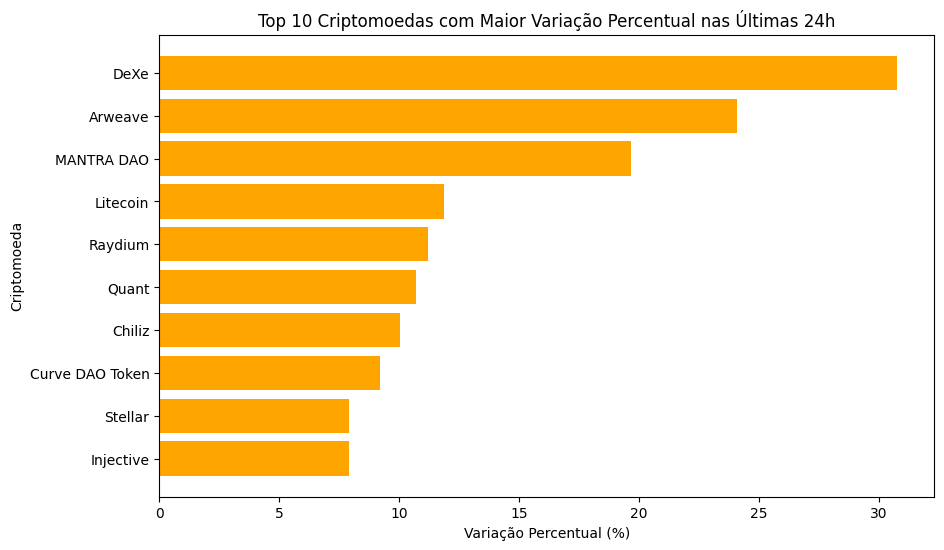

In [16]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Função para obter dados da API
def get_data_from_api(url, params=None):
    headers = {"User-Agent": "Mozilla/5.0"}  # Cabeçalho para compatibilidade
    try:
        response = requests.get(url, params=params, headers=headers)
        response.raise_for_status()  # Lança uma exceção se houver um erro HTTP
        return response.json()  # Retorna os dados em formato JSON
    except requests.exceptions.RequestException as e:
        print(f"Erro ao consumir a API: {e}")
        return None

# Função para obter a taxa de câmbio USD para BRL usando uma API gratuita
def get_usd_to_brl():
    url = "https://api.exchangerate-api.com/v4/latest/USD"  # API pública gratuita
    data = get_data_from_api(url)
    if data and "rates" in data:
        return data["rates"].get("BRL", None)  # Pegando a taxa de USD para BRL
    else:
        print("Erro ao obter a taxa de câmbio USD para BRL.")
        return None

# Função para listar as criptomoedas e criar tabela
def list_cryptocurrencies_table():
    # Obter taxa de câmbio USD para BRL
    usd_to_brl = get_usd_to_brl()
    if usd_to_brl is None:
        return "Erro ao obter a taxa de câmbio USD/BRL"

    url = "https://api.coincap.io/v2/assets"
    data = get_data_from_api(url)

    if data and "data" in data:
        # Criar lista de dados para a tabela
        crypto_data = [
            {
                "ID": asset['id'],
                "Nome": asset['name'],
                "Símbolo": asset['symbol'],
                "Preço BRL": round(float(asset['priceUsd']) * usd_to_brl, 2),  # Preço em BRL
                "Variação 24h (%)": round(float(asset.get('changePercent24Hr', 0)), 2)  # Variação em porcentagem
            }
            for asset in data["data"]
        ]

        # Criar o DataFrame
        df = pd.DataFrame(crypto_data)

        return df
    else:
        return "Erro ao obter dados das criptomoedas."

# Função para gerar o gráfico de colunas
def plot_top_cryptos_by_variation(df):
    # Ordenar pelo valor absoluto da variação percentual (em ordem decrescente)
    top_cryptos = df[['Nome', 'Variação 24h (%)']].sort_values(by='Variação 24h (%)', ascending=False).head(10)

    # Gerar o gráfico de colunas
    plt.figure(figsize=(10, 6))
    plt.barh(top_cryptos['Nome'], top_cryptos['Variação 24h (%)'], color='orange')
    plt.xlabel('Variação Percentual (%)')
    plt.ylabel('Criptomoeda')
    plt.title('Top 10 Criptomoedas com Maior Variação Percentual nas Últimas 24h')
    plt.gca().invert_yaxis()  # Inverter o eixo Y para mostrar a maior variação no topo
    plt.show()

# Exemplo de uso
df_cryptos = list_cryptocurrencies_table()
if isinstance(df_cryptos, pd.DataFrame):
    plot_top_cryptos_by_variation(df_cryptos)  # Gerar o gráfico com as 10 criptos mais variáveis
else:
    print(df_cryptos)  # Mostrar mensagem de erro


### Mercado X Criptomoeda

In [17]:
import requests
import pandas as pd
import time

# Função para obter os dados de criptomoedas
def get_cryptocurrencies():
    url = "https://api.coincap.io/v2/assets"
    headers = {"User-Agent": "Mozilla/5.0"}

    try:
        response = requests.get(url, headers=headers)
        response.raise_for_status()
        return response.json().get("data", [])
    except requests.exceptions.RequestException as e:
        print(f"Erro ao obter criptomoedas: {e}")
        return []

# Função para obter os mercados de uma criptomoeda específica
def get_market_data(base_symbol):
    url = "https://api.coincap.io/v2/markets"
    params = {"baseSymbol": base_symbol}
    headers = {"User-Agent": "Mozilla/5.0"}

    try:
        response = requests.get(url, params=params, headers=headers)
        response.raise_for_status()
        return response.json().get("data", [])
    except requests.exceptions.RequestException as e:
        print(f"Erro ao obter mercados para {base_symbol}: {e}")
        return []

# Função principal para coletar os mercados de todas as criptomoedas
def collect_all_markets():
    cryptos = get_cryptocurrencies()

    if not cryptos:
        print("Nenhuma criptomoeda encontrada.")
        return

    market_data_list = []

    for crypto in cryptos:
        symbol = crypto["symbol"]
        name = crypto["name"]
        print(f"Obtendo mercados para {name} ({symbol})...")

        markets = get_market_data(symbol)

        for market in markets:
            market_data_list.append({
                "Criptomoeda": name,
                "Símbolo": symbol,
                "Exchange": market["exchangeId"],
                "Par de Moedas": f"{market['baseSymbol']}/{market['quoteSymbol']}",
                "Preço (USD)": round(float(market["priceUsd"]), 2) if market["priceUsd"] else None,
                "Volume (USD 24h)": round(float(market["volumeUsd24Hr"]), 2) if market["volumeUsd24Hr"] else None,
                "Trades (24h)": market["tradesCount24Hr"] if market["tradesCount24Hr"] else None
            })

        time.sleep(1)  # Pequeno delay para evitar bloqueios na API

    # Criar DataFrame com os dados coletados
    df_markets = pd.DataFrame(market_data_list)

    # Salvar em um arquivo Excel
    df_markets.to_excel("mercados_criptomoedas.xlsx", index=False)
    print("Arquivo 'mercados_criptomoedas.xlsx' gerado com sucesso!")

# Executar a função
collect_all_markets()


Obtendo mercados para Bitcoin (BTC)...
Obtendo mercados para Ethereum (ETH)...
Obtendo mercados para XRP (XRP)...
Obtendo mercados para Tether (USDT)...
Obtendo mercados para Solana (SOL)...
Obtendo mercados para BNB (BNB)...
Obtendo mercados para USDC (USDC)...
Obtendo mercados para Dogecoin (DOGE)...
Obtendo mercados para Cardano (ADA)...
Obtendo mercados para Lido Staked ETH (STETH)...
Obtendo mercados para TRON (TRX)...
Obtendo mercados para Chainlink (LINK)...
Obtendo mercados para Avalanche (AVAX)...
Obtendo mercados para Wrapped Bitcoin (WBTC)...
Obtendo mercados para Stellar (XLM)...
Obtendo mercados para Shiba Inu (SHIB)...
Obtendo mercados para Litecoin (LTC)...
Obtendo mercados para Polkadot (DOT)...
Obtendo mercados para Bitcoin Cash (BCH)...
Obtendo mercados para Uniswap (UNI)...
Obtendo mercados para NEAR Protocol (NEAR)...
Obtendo mercados para Multi Collateral DAI (DAI)...
Obtendo mercados para Trump Official (TRUMP)...
Obtendo mercados para Aave (AAVE)...
Obtendo merca

### Conexão BD Local

In [ ]:
import mysql.connector
import pandas as pd
import numpy as np
import os
import time

# Conectar ao MySQL
conn = mysql.connector.connect(
    host=os.getenv('HOST'),
    user=os.getenv('USER'),
    password=os.getenv('PASS'),
    database=os.getenv('DB')
)
cursor = conn.cursor()

# Ajustar timeout para evitar bloqueios prolongados
cursor.execute("SET SESSION innodb_lock_wait_timeout = 120;")

# Carregar arquivos Excel
df_criptomoedas = pd.read_excel("dados_criptomoedas.xlsx")
df_mercados = pd.read_excel("mercados_criptomoedas.xlsx")
df_exchanges = pd.read_excel("dados_mercado.xlsx")

# Renomear colunas para corresponder ao banco de dados
df_criptomoedas.rename(columns={
    "ID": "id",
    "Nome": "nome",
    "Símbolo": "simbolo",
    "Preço BRL": "preco_brl",
    "Volume 24h": "volume_24h",
    "Variação 24h (%)": "variacao_24h_percentual",
    "Variação 24h em BRL": "variacao_24h_brl"
}, inplace=True)

df_exchanges.rename(columns={
    "Exchange": "nome",
    "ID da Exchange": "id_exchange",
    "Volume Total (USD)": "volume_total_usd",
    "Volume Percentual": "volume_percentual",
    "Pares de Negociação": "pares_negociacao",
    "URL da Exchange": "url_exchange"
}, inplace=True)

df_mercados.rename(columns={
    "Criptomoeda": "id_criptomoeda",
    "Símbolo": "simbolo",
    "Exchange": "id_exchange",
    "Par de Moedas": "par_moedas",
    "Preço (USD)": "preco_usd",
    "Volume (USD 24h)": "volume_usd_24h",
    "Trades (24h)": "trades_24h"
}, inplace=True)

# Substituir NaN por valores padrão (NULL no MySQL)
df_criptomoedas.replace({np.nan: None}, inplace=True)
df_exchanges.replace({np.nan: None}, inplace=True)
df_mercados.replace({np.nan: None}, inplace=True)

# Função para tentar executar queries com retry
def execute_with_retry(query, params, max_retries=3):
    for attempt in range(max_retries):
        try:
            cursor.execute(query, params)
            conn.commit()
            return
        except mysql.connector.Error as err:
            if "Lock wait timeout" in str(err):
                print(f"🔄 Tentativa {attempt + 1}/{max_retries}: Lock detectado! Esperando 5s...")
                time.sleep(5)
                conn.rollback()
            else:
                print("Erro crítico:", err)
                conn.rollback()
                break  # Sai do loop se não for erro de bloqueio

# Inserir criptomoedas evitando duplicatas
for _, row in df_criptomoedas.iterrows():
    cursor.execute("SELECT id FROM criptomoedas WHERE id = %s", (row["id"],))
    if cursor.fetchone() is None:
        execute_with_retry("""
            INSERT INTO criptomoedas (id, nome, simbolo, preco_brl, volume_24h, variacao_24h_percentual, variacao_24h_brl)
            VALUES (%s, %s, %s, %s, %s, %s, %s)
        """, (row["id"], row["nome"], row["simbolo"], row["preco_brl"], row["volume_24h"], row["variacao_24h_percentual"], row["variacao_24h_brl"]))

# Inserir exchanges evitando duplicatas
for _, row in df_exchanges.iterrows():
    cursor.execute("SELECT id FROM exchanges WHERE id_exchange = %s", (row["id_exchange"],))
    if cursor.fetchone() is None:
        execute_with_retry("""
            INSERT INTO exchanges (nome, id_exchange, volume_total_usd, volume_percentual, pares_negociacao, url_exchange)
            VALUES (%s, %s, %s, %s, %s, %s)
        """, (row["nome"], row["id_exchange"], row["volume_total_usd"], row["volume_percentual"], row["pares_negociacao"], row["url_exchange"]))

# Inserir mercados evitando duplicatas
for _, row in df_mercados.iterrows():
    cursor.execute("SELECT id FROM mercados WHERE id_criptomoeda = %s AND id_exchange = %s AND par_moedas = %s",
                   (row["id_criptomoeda"], row["id_exchange"], row["par_moedas"]))
    if cursor.fetchone() is None:
        execute_with_retry(""" 
            INSERT INTO mercados (id_criptomoeda, id_exchange, par_moedas, preco_usd, volume_usd_24h, trades_24h) 
            VALUES (%s, %s, %s, %s, %s, %s)
        """, (row["id_criptomoeda"], row["id_exchange"], row["par_moedas"], row["preco_usd"], row["volume_usd_24h"], row["trades_24h"]))

# Fechar conexão
cursor.close()
conn.close()

print("Dados inseridos com sucesso!")


### Atualização de Valores

In [ ]:
# Conectar ao MySQL
conn = mysql.connector.connect(
    host=os.getenv('HOST'),
    user=os.getenv('USER'),
    password=os.getenv('PASS'),
    database=os.getenv('DB')
)
cursor = conn.cursor()

# Ajustar timeout para evitar bloqueios prolongados
cursor.execute("SET SESSION innodb_lock_wait_timeout = 120;")

# Carregar arquivos Excel
df_criptomoedas = pd.read_excel("dados_criptomoedas.xlsx")
df_mercados = pd.read_excel("mercados_criptomoedas.xlsx")
df_exchanges = pd.read_excel("dados_mercado.xlsx")

# Renomear colunas para corresponder ao banco de dados
df_criptomoedas.rename(columns={
    "ID": "id",
    "Nome": "nome",
    "Símbolo": "simbolo",
    "Preço BRL": "preco_brl",
    "Volume 24h": "volume_24h",
    "Variação 24h (%)": "variacao_24h_percentual",
    "Variação 24h em BRL": "variacao_24h_brl"
}, inplace=True)

df_exchanges.rename(columns={
    "Exchange": "nome",
    "ID da Exchange": "id_exchange",
    "Volume Total (USD)": "volume_total_usd",
    "Volume Percentual": "volume_percentual",
    "Pares de Negociação": "pares_negociacao",
    "URL da Exchange": "url_exchange"
}, inplace=True)

df_mercados.rename(columns={
    "Criptomoeda": "id_criptomoeda",
    "Símbolo": "simbolo",
    "Exchange": "id_exchange",
    "Par de Moedas": "par_moedas",
    "Preço (USD)": "preco_usd",
    "Volume (USD 24h)": "volume_usd_24h",
    "Trades (24h)": "trades_24h"
}, inplace=True)

# Substituir NaN por valores padrão (NULL no MySQL)
df_criptomoedas.replace({np.nan: None}, inplace=True)
df_exchanges.replace({np.nan: None}, inplace=True)
df_mercados.replace({np.nan: None}, inplace=True)

# Função para executar queries com retry
def execute_with_retry(query, params, max_retries=3):
    for attempt in range(max_retries):
        try:
            cursor.execute(query, params)
            conn.commit()
            return
        except mysql.connector.Error as err:
            if "Lock wait timeout" in str(err):
                print(f"🔄 Tentativa {attempt + 1}/{max_retries}: Lock detectado! Esperando 5s...")
                time.sleep(5)
                conn.rollback()
            else:
                print("Erro crítico:", err)
                conn.rollback()
                break  # Sai do loop se não for erro de bloqueio

# Atualizar criptomoedas
for _, row in df_criptomoedas.iterrows():
    execute_with_retry("""
        UPDATE criptomoedas
        SET nome = %s, simbolo = %s, preco_brl = %s, volume_24h = %s, variacao_24h_percentual = %s, variacao_24h_brl = %s
        WHERE id = %s
    """, (row["nome"], row["simbolo"], row["preco_brl"], row["volume_24h"], row["variacao_24h_percentual"], row["variacao_24h_brl"], row["id"]))

# Atualizar exchanges
for _, row in df_exchanges.iterrows():
    execute_with_retry("""
        UPDATE exchanges
        SET nome = %s, volume_total_usd = %s, volume_percentual = %s, pares_negociacao = %s, url_exchange = %s
        WHERE id_exchange = %s
    """, (row["nome"], row["volume_total_usd"], row["volume_percentual"], row["pares_negociacao"], row["url_exchange"], row["id_exchange"]))

# Atualizar mercados
for _, row in df_mercados.iterrows():
    execute_with_retry("""
        UPDATE mercados
        SET preco_usd = %s, volume_usd_24h = %s, trades_24h = %s
        WHERE id_criptomoeda = %s AND id_exchange = %s AND par_moedas = %s
    """, (row["preco_usd"], row["volume_usd_24h"], row["trades_24h"], row["id_criptomoeda"], row["id_exchange"], row["par_moedas"]))

# Fechar conexão
cursor.close()
conn.close()

print("Dados atualizados com sucesso!")
